In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [70]:
mnist = fetch_openml("mnist_784", version=1)

c:\Users\allysson.muniz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [71]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x, y = mnist["data"].values, mnist["target"].values
y = y.astype(np.float)

C:\Users\allysson.muniz\AppData\Local\Temp\ipykernel_12192\971646158.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


In [5]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

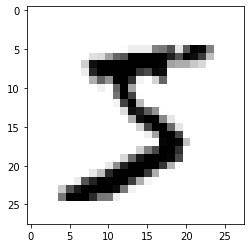

In [15]:
plt.imshow(x[0].reshape(28, 28), cmap="binary")

### Classificador binário

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
y_train_5 = (y_train == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

Classe real:  False
Classe predita pelo modelo:  [False]


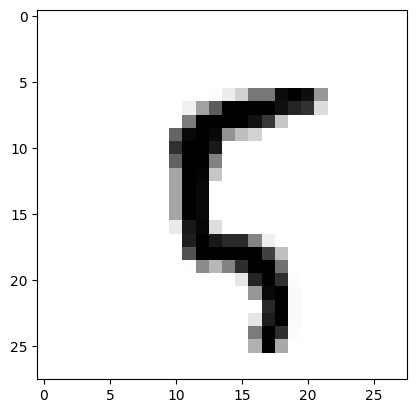

In [52]:
n = 100
plt.imshow(x[n].reshape(28, 28), cmap="binary")

print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

### Como estimar a acuácia de um modelo

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95892004, 0.9628972 , 0.96014204])

### A matriz de confusão

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[43762,   802],
       [  660,  3776]], dtype=int64)

In [56]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.8248143294014854
Recall:  0.8512173128944995


In [57]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print(classification_report(y_train_5, y_train_pred))

[[43762   802]
 [  660  3776]]
              precision    recall  f1-score   support

       False       0.99      0.98      0.98     44564
        True       0.82      0.85      0.84      4436

    accuracy                           0.97     49000
   macro avg       0.90      0.92      0.91     49000
weighted avg       0.97      0.97      0.97     49000



### Classificação multiclasse

In [58]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

Classe real:  0.0
Classe predita pelo modelo:  [0.]


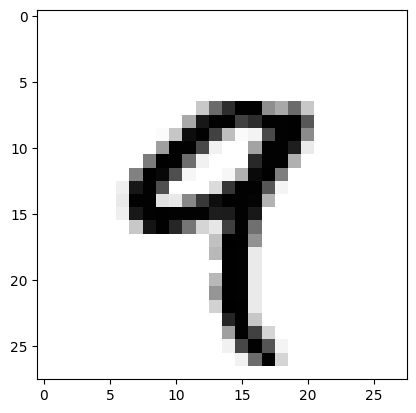

In [65]:
n = 4
plt.imshow(x[n].reshape(28, 28), cmap="binary")

print("Classe real: ", y_train[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

In [59]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [66]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4680    0   18   19    1   31   28    3   41   10]
 [   1 5314   66   23    5   28    9   14   79    8]
 [  60   40 4213   91   56   60  100   72  149   12]
 [  40   22  169 4239    8  270   25   47  137   57]
 [  22   20   45   25 3989   23   75   36  140  360]
 [  76   16   38  127   31 3722  147   21  192   66]
 [  49   15   51    2   14   90 4596    6   22    1]
 [  23   23   57   26   33   16    6 4661   38  213]
 [  33  113  115  116   16  268   66   47 3934  104]
 [  28   30   35   76   85   68    2  315  136 4055]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      4831
         1.0       0.95      0.96      0.95      5547
         2.0       0.88      0.87      0.87      4853
         3.0       0.89      0.85      0.87      5014
         4.0       0.94      0.84      0.89      4735
         5.0       0.81      0.84      0.83      4436
         6.0       0.91      0.95      0.93      4846
         7.0       0.89      0.91   

<AxesSubplot: >

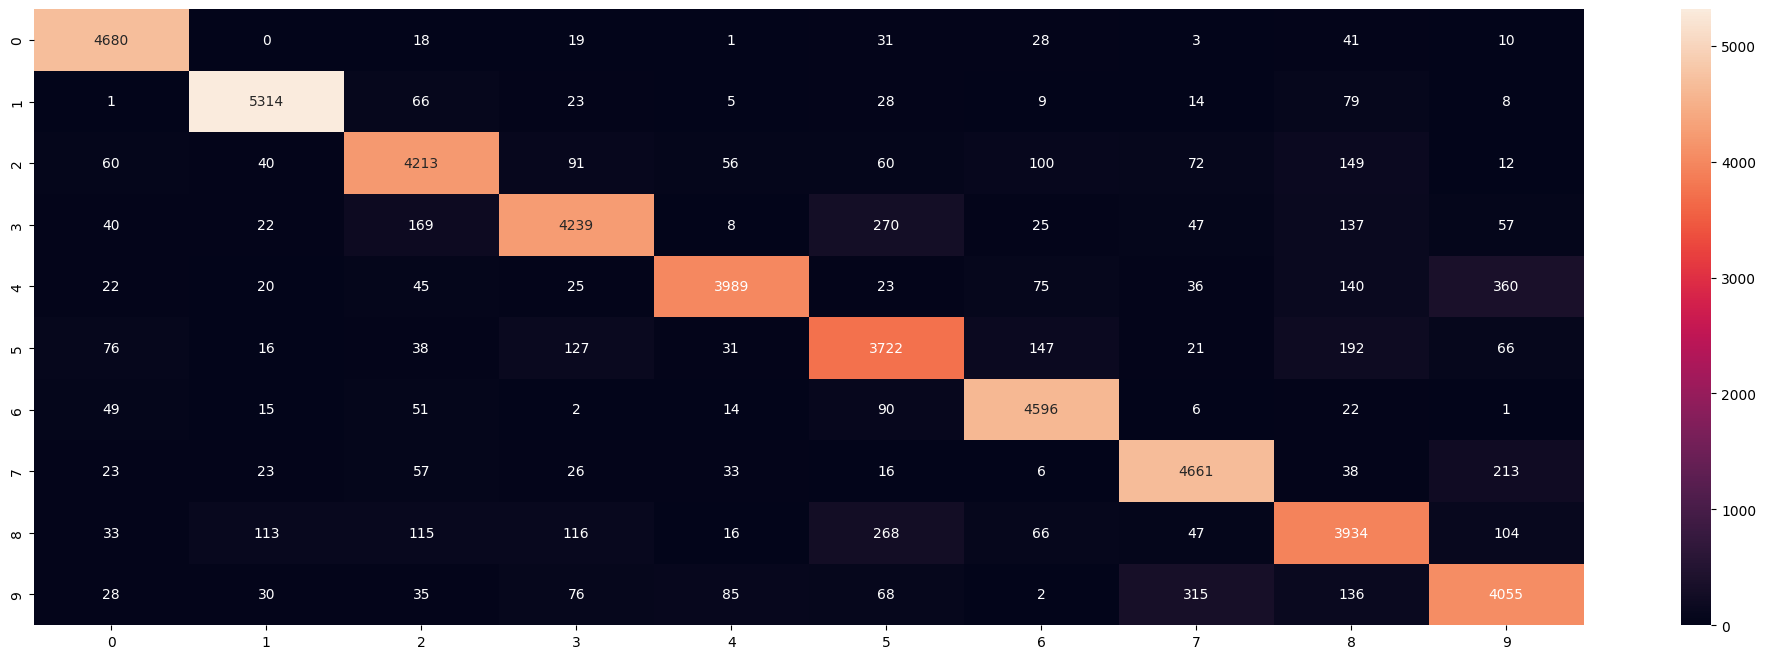

In [67]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

<AxesSubplot: >

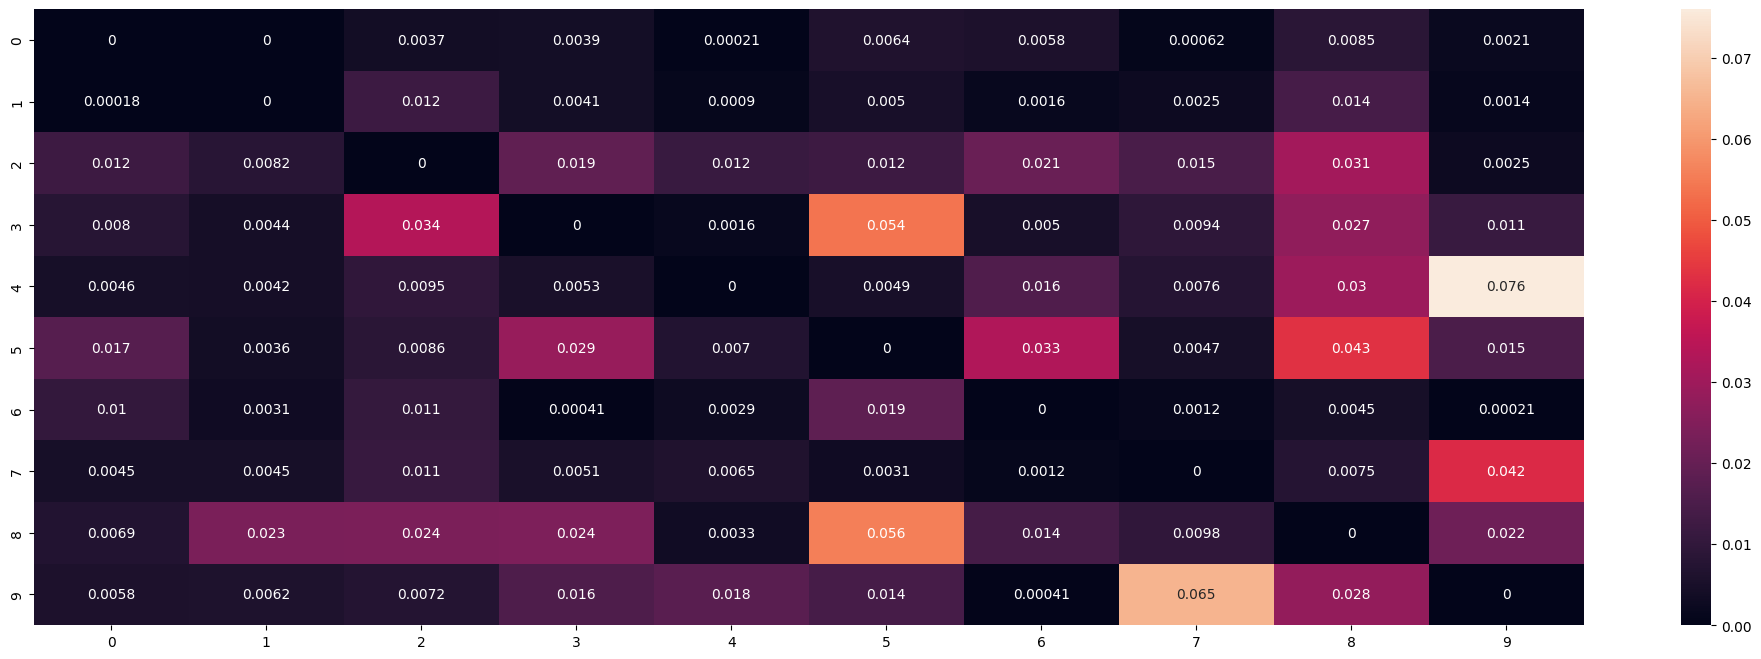

In [68]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(norm_conf_mx, annot=True)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

y_train_larger = (y_train >= 7)
y_train_odd = (y_train %2 ==1)
y_multilabel = np.C_[y_train_larger, y_train_odd]

AttributeError: module 'numpy' has no attribute 'C_'